## EDA Student Performance Indicator

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

## 4. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [4]:
#check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Insights or Observation

There are no missing values.

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
## Check Duplicates
df.duplicated().sum()

0

## Insights or Observation
There are no Duplicate Values.

In [7]:
## Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
## Checking the number of uniques values of each columns
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
## Check Statistics
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights or Observation
* From the above description of numerical data,all means are very close to each other- between 66 and 69
* All the standard deviation are also close- between 14.6- 15.19
* While there is a minimum of 0 for maths,other are having 17 and 10 value

In [10]:
## Explore more information about data
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [12]:
[features for features in df.columns if df[features].dtypes!='O']

['math_score', 'reading_score', 'writing_score']

In [13]:
## segregate numerical and categorical features
numerical_features=[features for features in df.columns if df[features].dtypes!='O']
categorical_features=[features for features in df.columns if df[features].dtypes=='O']

In [14]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [15]:
## Aggregate the total score with mean

df['total_score'] = (df['math_score']+df['reading_score']+df['writing_score'])
df['average']=df['total_score'] / 3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot: xlabel='average', ylabel='Count'>

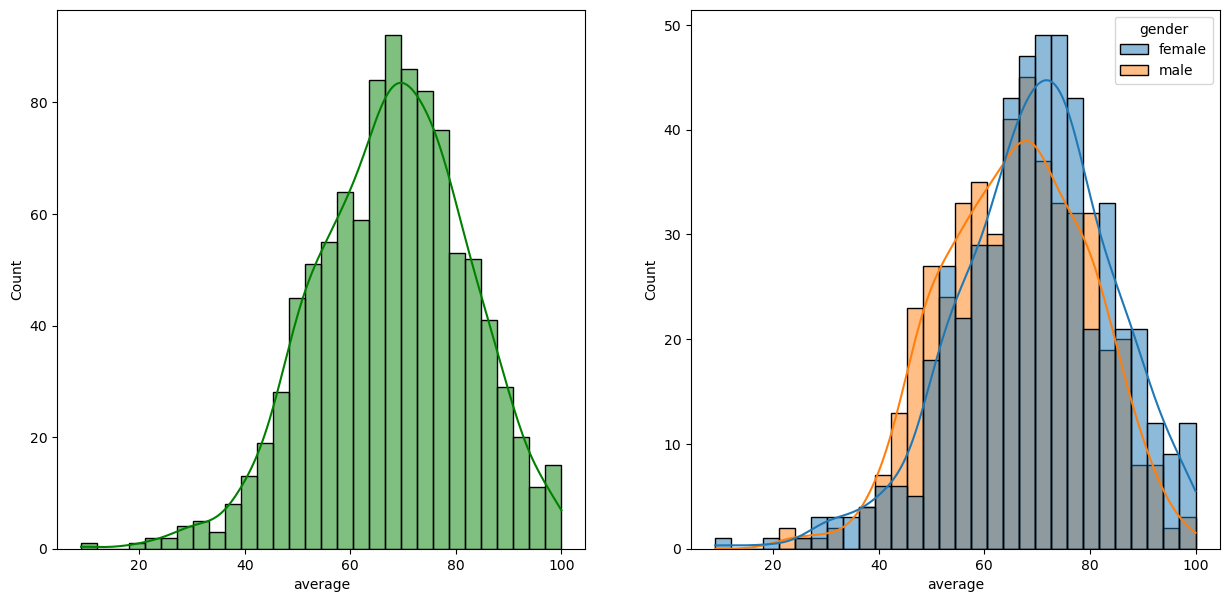

In [16]:
## Exploring more visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121) ## One row Two column,Location 1.
sns.histplot(data=df,x='average',bins=30,kde=True,color='green')

plt.subplot(122) ## One row Two column,Location 2.
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

## Observation and Insights 

Female students tend to perform well than male students.

<AxesSubplot: xlabel='average', ylabel='Count'>

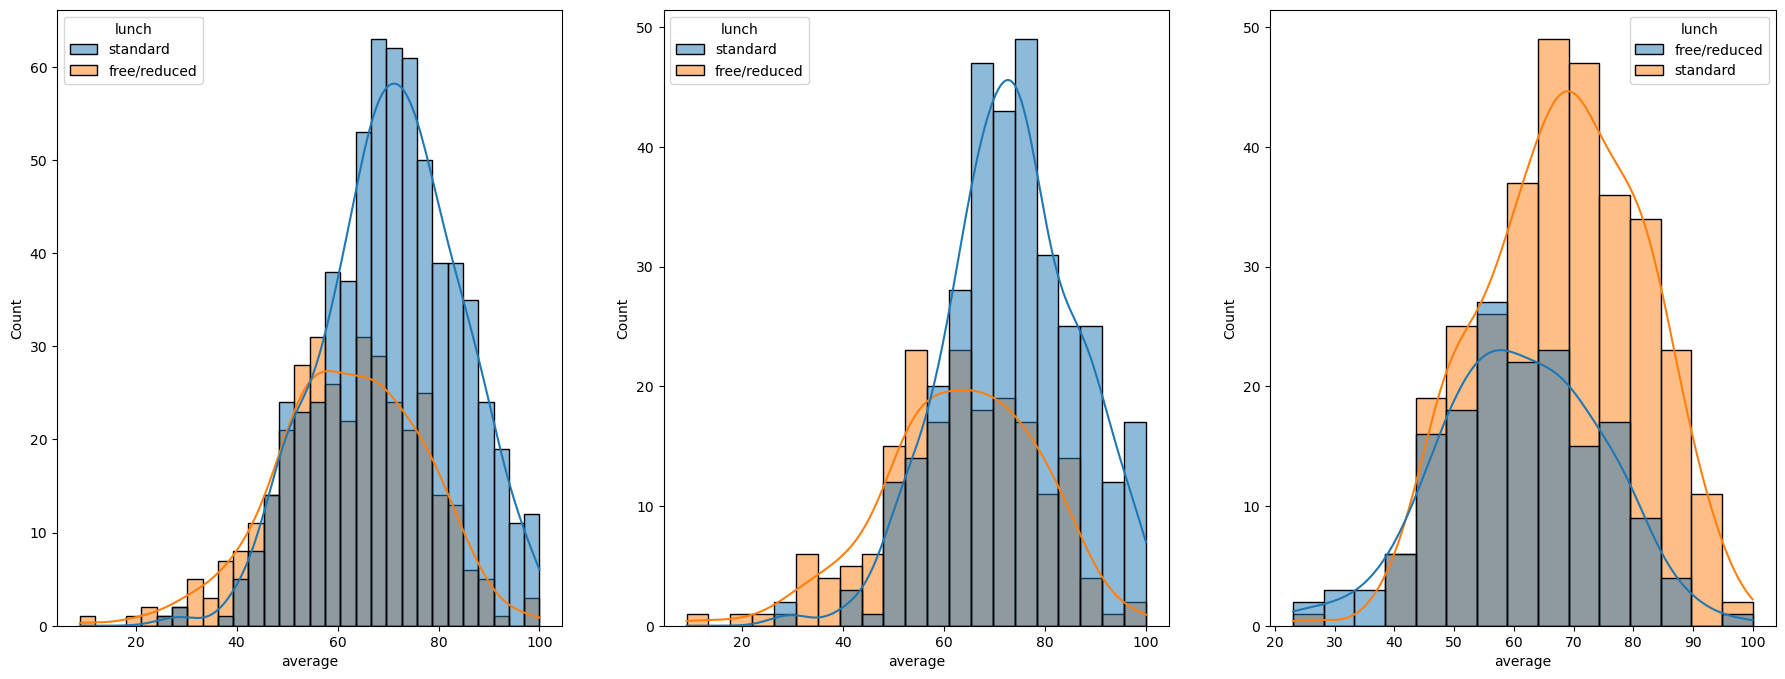

In [17]:
## Exploring more visualization
fig,axis=plt.subplots(1,3,figsize=(30,8))

plt.subplot(141) 
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch')

plt.subplot(142) 
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')

plt.subplot(143) 
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

## Observations and Insights
* Average score of students with Standard luch is high as compared to students with free/reduced lunch.
* Standard Lunch helps students perform well in exams


<AxesSubplot: xlabel='average', ylabel='Count'>

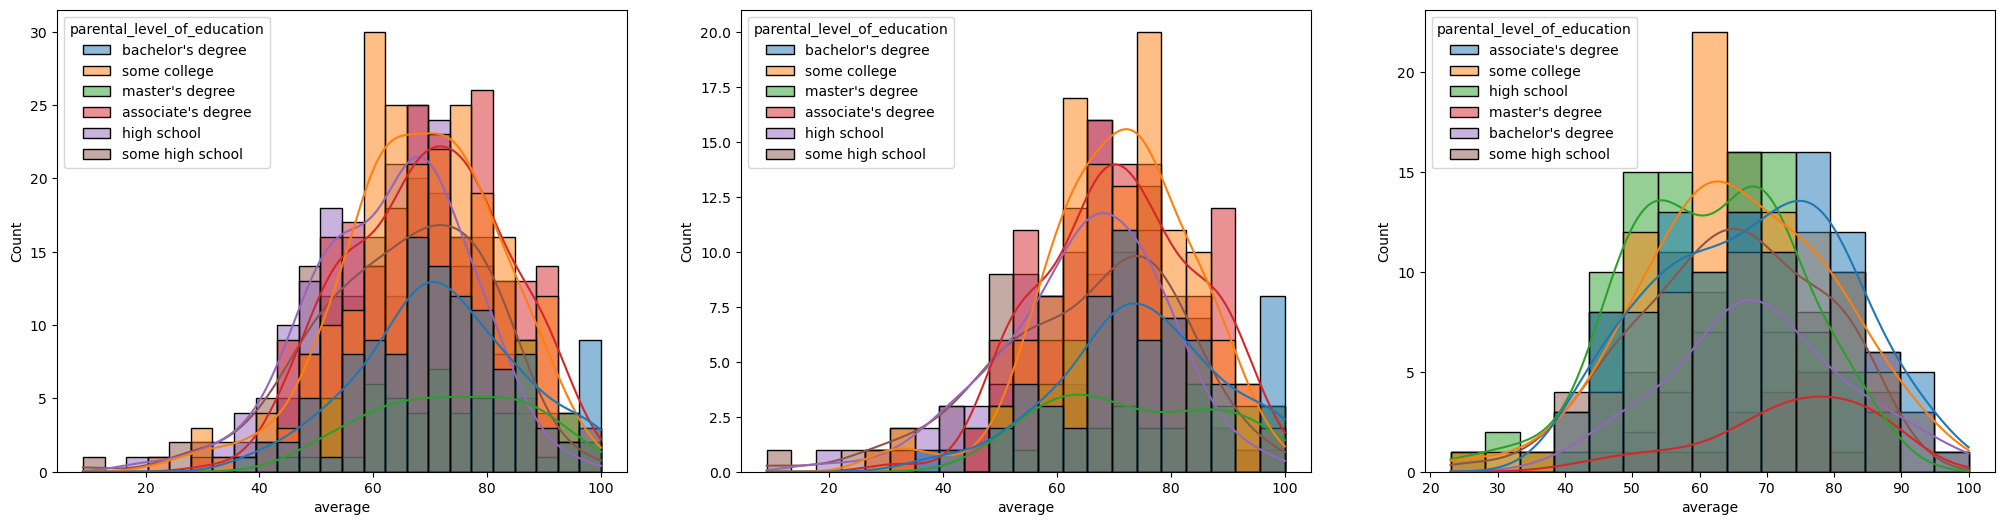

In [18]:
fig,axis=plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')

plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')

plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')

## Observations and Insights
* In General, Parental level of Education does not affect the performance of students in exam.
* Parental level of Education does not affect the performance of female students in exams.
* Parental level of Education affects the performance of male students in exams.

<AxesSubplot: xlabel='average', ylabel='Count'>

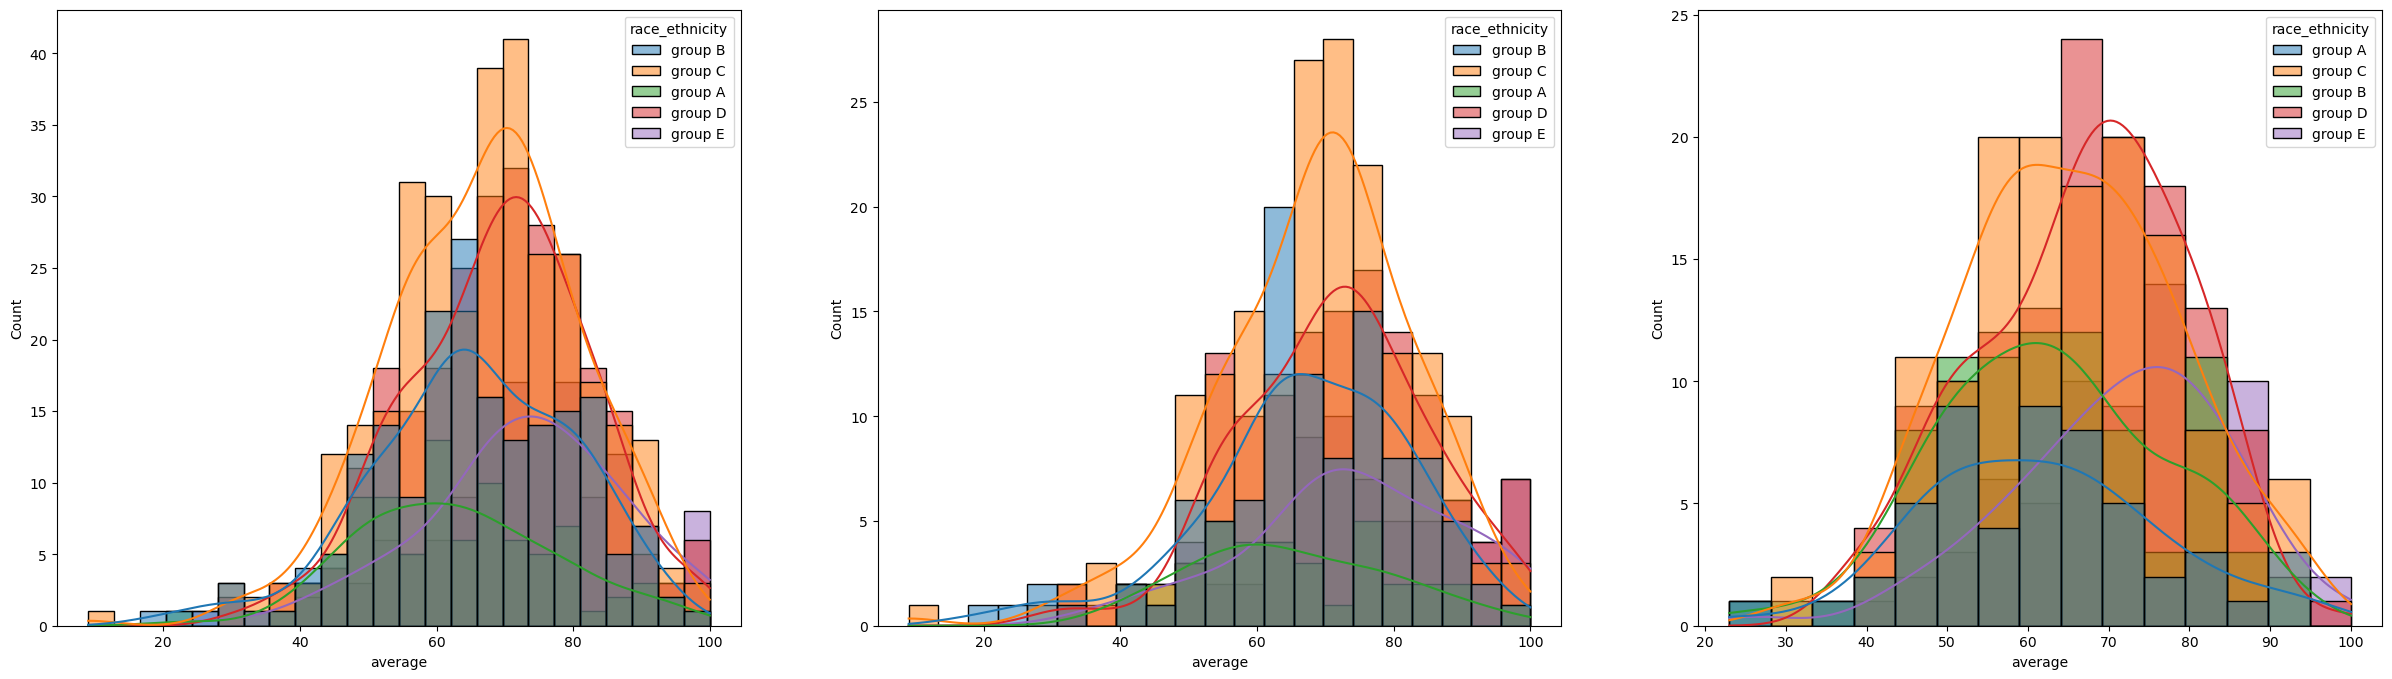

In [21]:
fig,aixs=plt.subplots(1,3,figsize=(30,8))
plt.subplot(131)
sns.histplot(data=df,x='average',color='green',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',color='green',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',color='green',kde=True,hue='race_ethnicity')

## Insights/ Observations:
* Students of group A and group B tends to perform poorly in exam irrespective of whether they aremale or female.

<AxesSubplot: >

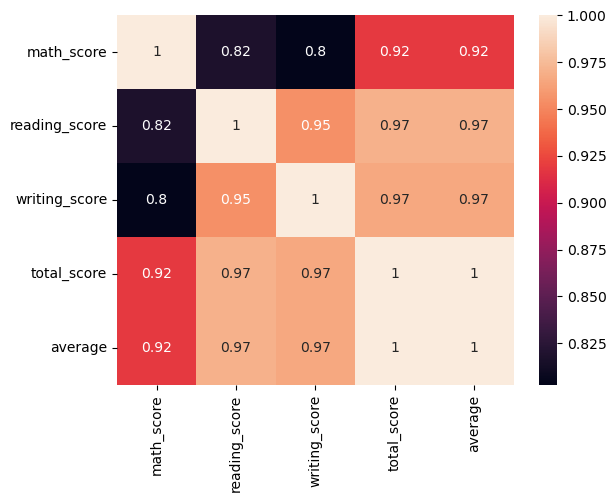

In [24]:
## with numerical variables
sns.heatmap(df.corr(),annot=True)

## Insights / Observations
* We can see a positive correaltion between the Variables.

# The End